Programmer: Giovanni Vecchione
Date: 2/12/24
Subject: Project 1

Create a Deep Neural Networks model using the data set of your choice. Model should have at least 4 hidden layers. Dropout and Batch Normalization layers are not counted.

MODEL 1 Ver. 1 - Image Classifier Using the Sequential API (w/o batch normalization and dropout layers)

1x input layer
1x flatten layer
3x hidden layers
1x output layer

Data set: Keras database of fashion_mnist

!!!!!NOTE!!!!!: This is an inaccurate representation of an image classifier due to errors. This was my first attempt at building a MLP, however model 1_2 corrects these issues. Left it in my notebook to showcase the improvements. Model 2 has the dropout and batch normalization layers

In [1]:
import tensorflow as tf
import matplotlib as mpl

#Step 1 - Prep the data *********************************************************************************************

#import data - CHOOSE DATA, CREATE MLP, OBSERVE RESULTS, ADD ANOTHER LAYER SEE WHAT HAPPENS, FINE TUNE
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

#split the data between training and test sets, and leave some left over for training set validation
#training set (60,000 images) and a test set (10,000 images), but well hold out the last 5,000 images from the training set for validation

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

#scale and label if needed

#Step 2 - CREATING THE NEURAL NET (MLP for this one) ****************************************************************************

#NOTE -  the random weights of the hidden layers and the output layer will be the same every time you run the notebook. 
#You could also choose to use the tf.keras.utils.set_random_seed() function, 
#which conveniently sets the random seeds for TensorFlow, Python (random.seed()), and NumPy (np.random.seed()).

tf.random.set_seed(42)
model1_1 = tf.keras.Sequential()

#input layer - Keras needs to know the shape of the inputs so it can determine the shape of the connection weight matrix of the first hidden layer.
model1_1.add(tf.keras.layers.Input(shape=[28, 28]))

#flatten layer - converts each input image into a 1D array.
model1_1.add(tf.keras.layers.Flatten())

#hidden layers - activation function can be changed if needed. Each "Dense" layer manages its own weight matrix
model1_1.add(tf.keras.layers.Dense(300, activation="relu")) 
model1_1.add(tf.keras.layers.Dense(100, activation="relu"))
model1_1.add(tf.keras.layers.Dense(100, activation="relu"))

#output layer - 1 neuron per class, using the softmax activation function because the classes are exclusive.
model1_1.add(tf.keras.layers.Dense(10, activation="softmax"))

model1_1.summary()

#NOTE: You can add an optimizer so that you can adjust the learning rate, however we will save this for the next trial model

#if you want to see layers or weights use get_layer() and get_weights()

#Step 3 - Compile the model ***************************************************************************
#NOTE - Use sparse_categorical crossentropy loss because we have sparse labels (i.e., for each instance, there is just a target class index, 
#from 0 to 9 in this case),and the classes are exclusive.
model1_1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#NOTE: You can add a adapt() call here, however we will save that for the next trial model

#Step 4 - Train and Evaluate model ***********************************************************************
#use fit() to train, epochs test how many trials occur
history1_1 = model1_1.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

#Step 5 - Check for overfitting and retest if needed
mse_test1_1, rmse_test1_1 = model1_1.evaluate(X_test, y_test)


#Step 6 - Visualize the data (if you want)

#Step 7 - Use the model to make predictions
X_new = X_test[:3]
y_pred = model1_1.predict(X_new)


4422102/4422102 [==============================] - 0s 0us/step

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 276710 (1.06 MB)
Trainable params: 276710 (1.06 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________

TEST 1: Model1.1 Results
Model1.1 above has some serious issues. First the loss is appearing as 'nan' which may be an error during calculations. Second the accuracy values are very poor.

Potential Reasons:
Vanishing/Exploding Gradients: With multiple hidden layers, ReLU activations, and no regularization, you could be running into gradient problems. It's essential to investigate this as a primary cause.

Learning Rate: Your learning rate may be too high, causing the optimizer to overshoot and create instability.

Architecture Imbalance: The relatively deep architecture, with the number of neurons in each layer, might not be optimal for this dataset.

MODEL 1 Ver. 2 - Image Classifier Using the Sequential API (Debugged and w/o batch normalization and dropout layers)

1x input layer
1x flatten layer
3x hidden layers 
1x output layer

Data set: Keras database of fashion_mnist

CORRECTIONS:
The prevous model had uneeded lines of code, and also forgot to scale and label the data.
Made corrections for appropriate output and now this is the correct strucutre.

In [7]:
import tensorflow as tf
import matplotlib as mpl

#Step 1 - Prep the data *********************************************************************************************

#import data - CHOOSE DATA, CREATE MLP, OBSERVE RESULTS, ADD ANOTHER LAYER SEE WHAT HAPPENS, FINE TUNE
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

#split the data between training and test sets, and leave some left over for training set validation
#training set (60,000 images) and a test set (10,000 images), but well hold out the last 5,000 images from the training set for validation

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

#scale
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

#label
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#Step 2 - CREATING THE NEURAL NET (MLP for this one) ****************************************************************************

#NOTE -  the random weights of the hidden layers and the output layer will be the same every time you run the notebook. 
#You could also choose to use the tf.keras.utils.set_random_seed() function, 
#which conveniently sets the random seeds for TensorFlow, Python (random.seed()), and NumPy (np.random.seed()).

tf.random.set_seed(42)
model1_2 = tf.keras.Sequential()

#simplified model struct.
model1_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model1_2.summary()

#NOTE: You can add an optimizer so that you can adjust the learning rate, however we will save this for the next trial model

#if you want to see layers or weights use get_layer() and get_weights()

#Step 3 - Compile the model ***************************************************************************
#NOTE - Use sparse_categorical crossentropy loss because we have sparse labels (i.e., for each instance, there is just a target class index, 
#from 0 to 9 in this case),and the classes are exclusive.
model1_2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

#NOTE: You can add a adapt() call here if using a normalization method, however we will save that for the next trial model

#Step 4 - Train and Evaluate model ***********************************************************************
#use fit() to train, epochs test how many trials occur
history1_2 = model1_2.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 300)               235500    
                                                                 
 dense_20 (Dense)            (None, 100)               30100     
                                                                 
 dense_21 (Dense)            (None, 25)                2525      
                                                                 
 dense_22 (Dense)            (None, 10)                260       
                                                                 
Total params: 268385 (1.02 MB)
Trainable params: 268385 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
1719/17

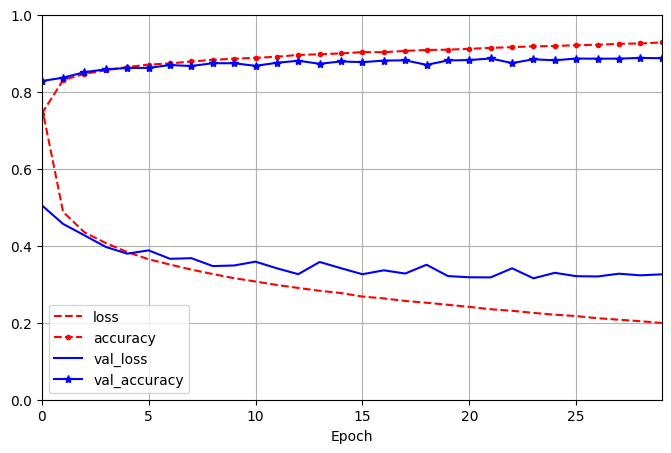

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history1_2.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

MODEL 2- Image Classifier Using the Sequential API (w/ Batch Normalization and Dropout Layers)

1x input layer
1x flatten layer
3x hidden layers
1x output layer

w/ dropout and batch normalization layers

Data set: Keras database of fashion_mnist

NOTE: 
-Cleaned up format of code
-Use of  Dropout and Batch Normalization layers

This is the final model that will then be used for Project 2.